In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import os
import shutil
import random
import cv2

In [ ]:
!pip install torchinfo
from torchinfo import summary
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 7.5 MB/s eta 0:00:00


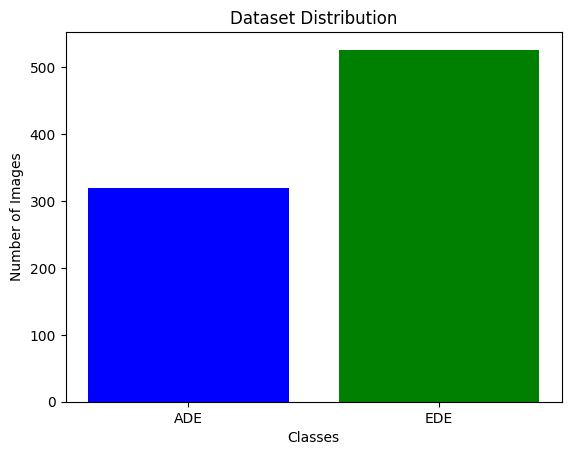

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the paths to your subfolders
class1_path = "/content/drive/MyDrive/dataset/OriginalDataset/ADE"
class2_path = "/content/drive/MyDrive/dataset/OriginalDataset/EDE"

# Count the number of images in each class
class1_count = len(os.listdir(class1_path))
class2_count = len(os.listdir(class2_path))

# Names of the classes
class_names = ['ADE', 'EDE']

# Counts of images in each class
class_counts = [class1_count, class2_count]

# Create a bar chart
plt.bar(class_names, class_counts, color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Dataset Distribution')
plt.show()

#Set data into train, test and validation

In [ ]:
# Set up paths
source_folder = '/content/drive/MyDrive/dataset/OriginalDataset'
target_folder = '/content/drive/MyDrive/dataset/DryEyeDataset'
train_folder = os.path.join(target_folder, 'train')
val_folder = os.path.join(target_folder, 'val')
test_folder = os.path.join(target_folder, 'test')

# Create target directories
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Subclass names
subclasses = ['EDE', 'ADE']

# Percentage split for train, validation, and test sets
train_split = 0.8
val_split = 0.1
test_split = 0.1

# Loop through subclasses
for subclass in subclasses:
    subclass_source_folder = os.path.join(source_folder, subclass)
    subclass_train_folder = os.path.join(train_folder, subclass)
    subclass_val_folder = os.path.join(val_folder, subclass)
    subclass_test_folder = os.path.join(test_folder, subclass)

    os.makedirs(subclass_train_folder, exist_ok=True)
    os.makedirs(subclass_val_folder, exist_ok=True)
    os.makedirs(subclass_test_folder, exist_ok=True)

    # List all image files in the subclass source folder
    image_files = [f for f in os.listdir(subclass_source_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(image_files)

    num_images = len(image_files)
    num_train = int(train_split * num_images)
    num_val = int(val_split * num_images)

    # Move images to respective folders
    for i, image_file in enumerate(image_files):
        source_path = os.path.join(subclass_source_folder, image_file)
        if i < num_train:
            target_path = os.path.join(subclass_train_folder, image_file)
        elif i < num_train + num_val:
            target_path = os.path.join(subclass_val_folder, image_file)
        else:
            target_path = os.path.join(subclass_test_folder, image_file)
        shutil.copy(source_path, target_path)

print("Data splitting and directory setup complete.")

Data splitting and directory setup complete.


#display freqeuency of dataset

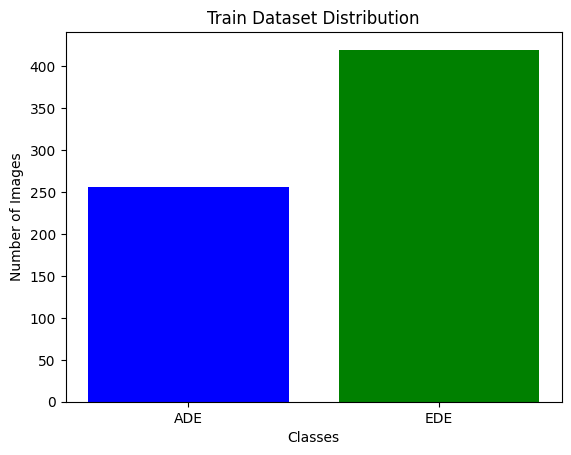

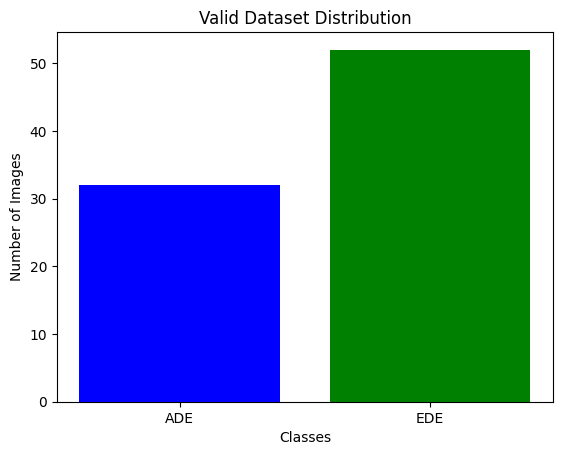

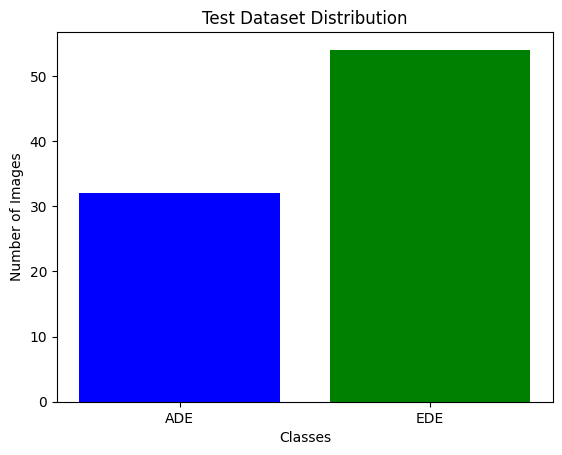

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the paths to your subfolders
class1_path = "/content/drive/MyDrive/dataset/DryEyeDataset/train/ADE"
class2_path = "/content/drive/MyDrive/dataset/DryEyeDataset/train/EDE"

# Count the number of images in each class
class1_count = len(os.listdir(class1_path))
class2_count = len(os.listdir(class2_path))

# Names of the classes
class_names = ['ADE', 'EDE']

# Counts of images in each class
class_counts = [class1_count, class2_count]

# Create a bar chart
plt.bar(class_names, class_counts, color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Train Dataset Distribution')
plt.show()

import os
import matplotlib.pyplot as plt

# Define the paths to your subfolders
class1_path = "/content/drive/MyDrive/dataset/DryEyeDataset/val/ADE"
class2_path = "/content/drive/MyDrive/dataset/DryEyeDataset/val/EDE"

# Count the number of images in each class
class1_count = len(os.listdir(class1_path))
class2_count = len(os.listdir(class2_path))

# Names of the classes
class_names = ['ADE', 'EDE']

# Counts of images in each class
class_counts = [class1_count, class2_count]

# Create a bar chart
plt.bar(class_names, class_counts, color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Valid Dataset Distribution')
plt.show()

import os
import matplotlib.pyplot as plt

# Define the paths to your subfolders
class1_path = "/content/drive/MyDrive/dataset/DryEyeDataset/test/ADE"
class2_path = "/content/drive/MyDrive/dataset/DryEyeDataset/test/EDE"

# Count the number of images in each class
class1_count = len(os.listdir(class1_path))
class2_count = len(os.listdir(class2_path))

# Names of the classes
class_names = ['ADE', 'EDE']

# Counts of images in each class
class_counts = [class1_count, class2_count]

# Create a bar chart
plt.bar(class_names, class_counts, color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Test Dataset Distribution')
plt.show()

#setting up train, validation and test directories

In [ ]:
#setting up train, validation and test directories
train_dir = "/content/drive/MyDrive/dataset/DryEyeDataset/train"
valid_dir = "/content/drive/MyDrive/dataset/DryEyeDataset/val"
test_dir = "/content/drive/MyDrive/dataset/DryEyeDataset/test"
image_dir = '/content/drive/MyDrive/dataset/OriginalDataset'

In [ ]:
# Function to load and preprocess the images
def load_images(image_dir):
    images = []
    labels = []
    label_mapping = {}
    label_counter = 0

    # Iterate through the image directory
    for folder_name in os.listdir(image_dir):
        folder_path = os.path.join(image_dir, folder_name)
        if os.path.isdir(folder_path):
            label_mapping[folder_name] = label_counter
            label_counter += 1

            # Iterate through the images in each folder
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
                image = cv2.resize(image, (224, 224))  # Resize the image to a desired size

                # Split the image into Y, Cr, Cb channels
                Y, Cr, Cb = cv2.split(image)

                # Apply contrast adaptive histogram equalization on the Y channel
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                enhanced_Y = clahe.apply(Y)

                # Merge the enhanced Y channel with the Cr and Cb channels
                enhanced_image = cv2.merge((enhanced_Y, Cr, Cb))

                images.append(enhanced_image)
                labels.append(folder_name)

    # Convert labels from string to integer
    labels = [label_mapping[label] for label in labels]

    return np.array(images), np.array(labels)

In [ ]:
# Load the images and labels
images, labels = load_images(image_dir)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# setting up a function to know how many images and classes are available

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

In [ ]:
# Reshape the images to 1D array
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# setting up a function to know how many images and classes are available
def walk_through(path: str):
    """
    Getting the number of images in each classes.
    """
    for dirpath, dirname, filename in os.walk(path):
        print(f"Directory: {dirpath}")
        print(f"No. of Sub-directories: {len(dirname)}")
        print(f"No. of Files: {len(filename)}\n")

In [ ]:
walk_through(train_dir)

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/train
No. of Sub-directories: 2
No. of Files: 0

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/train/EDE
No. of Sub-directories: 0
No. of Files: 420

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/train/ADE
No. of Sub-directories: 0
No. of Files: 256



In [ ]:
walk_through(valid_dir)

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/val
No. of Sub-directories: 2
No. of Files: 0

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/val/EDE
No. of Sub-directories: 0
No. of Files: 52

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/val/ADE
No. of Sub-directories: 0
No. of Files: 32



In [ ]:
walk_through(test_dir)

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/test
No. of Sub-directories: 2
No. of Files: 0

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/test/EDE
No. of Sub-directories: 0
No. of Files: 54

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/test/ADE
No. of Sub-directories: 0
No. of Files: 32



#data balancing technique using oversample method

In [ ]:
def oversample_class(class_dir, target_size):
    files = os.listdir(class_dir)
    current_size = len(files)

    if current_size >= target_size:
        return

    oversample_count = target_size - current_size
    while oversample_count > 0:
        file = random.choice(files)
        source_path = os.path.join(class_dir, file)
        dest_path = os.path.join(class_dir, f"oversampled_{file}")
        shutil.copyfile(source_path, dest_path)
        oversample_count -= 1

In [ ]:
target_size = 420  # Adjust this to the desired balanced size
classes = os.listdir(train_dir)

for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    oversample_class(class_dir, target_size)

In [ ]:
walk_through(train_dir)

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/train
No. of Sub-directories: 2
No. of Files: 0

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/train/EDE
No. of Sub-directories: 0
No. of Files: 420

Directory: /content/drive/MyDrive/dataset/DryEyeDataset/train/ADE
No. of Sub-directories: 0
No. of Files: 396



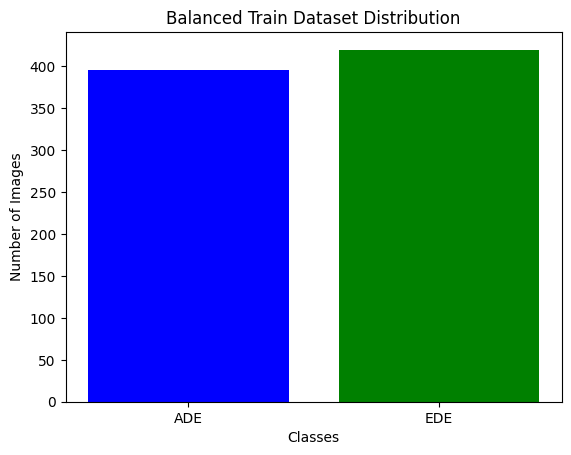

In [ ]:
# Define the paths to your subfolders
class1_path = "/content/drive/MyDrive/dataset/DryEyeDataset/train/ADE"
class2_path = "/content/drive/MyDrive/dataset/DryEyeDataset/train/EDE"

# Count the number of images in each class
class1_count = len(os.listdir(class1_path))
class2_count = len(os.listdir(class2_path))

# Names of the classes
class_names = ['ADE', 'EDE']

# Counts of images in each class
class_counts = [class1_count, class2_count]

# Create a bar chart
plt.bar(class_names, class_counts, color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Balanced Train Dataset Distribution')
plt.show()

# creating a list of class_names

In [ ]:
# creating a list of class_names
class_names = []
for dir_name in os.listdir(train_dir):
    class_names.append(dir_name)

class_names.sort()
class_names

['ADE', 'EDE']

In [ ]:
len(class_names)

2

In [ ]:
train_dir, valid_dir, test_dir

('/content/drive/MyDrive/dataset/DryEyeDataset/train',
 '/content/drive/MyDrive/dataset/DryEyeDataset/val',
 '/content/drive/MyDrive/dataset/DryEyeDataset/test')

In [ ]:
test_dir.split("/")[-1]

'test'

In [ ]:
def get_total_images(path):
  """
  Returns the total number of images of all classes in the directory
  """
  total_images = 0
  for classes in os.listdir(path):
      for imgs in os.listdir(path + "/" + classes):
          total_images += 1
  return total_images

In [ ]:
get_total_images(train_dir)

816

In [ ]:
get_total_images(valid_dir)

84

In [ ]:
get_total_images(test_dir)

86

#random image plot

In [ ]:
def random_img_plot(img_path: str, num_images: int):
    """
    Randomly plot an image in the given class.
    """
    class_name = random.sample(class_names, k=num_images)

    actual_img_path_list = [img_path + "/" + cls for cls in class_name]
    img_path_list = []
    for img_path in actual_img_path_list:
      for dirpath, _ , images in os.walk(img_path):
        img_path_list.append(dirpath + "/" + random.sample(images, k=1)[0])

    plt.figure(figsize=(30, 10))
    for ind, img in enumerate(img_path_list):
        plt.subplot(1, num_images, ind+1)
        plt.imshow(plt.imread(img))
        plt.axis(False)
        plt.title(class_name[ind]+f"\nSize: {plt.imread(img).shape}", fontsize=18)

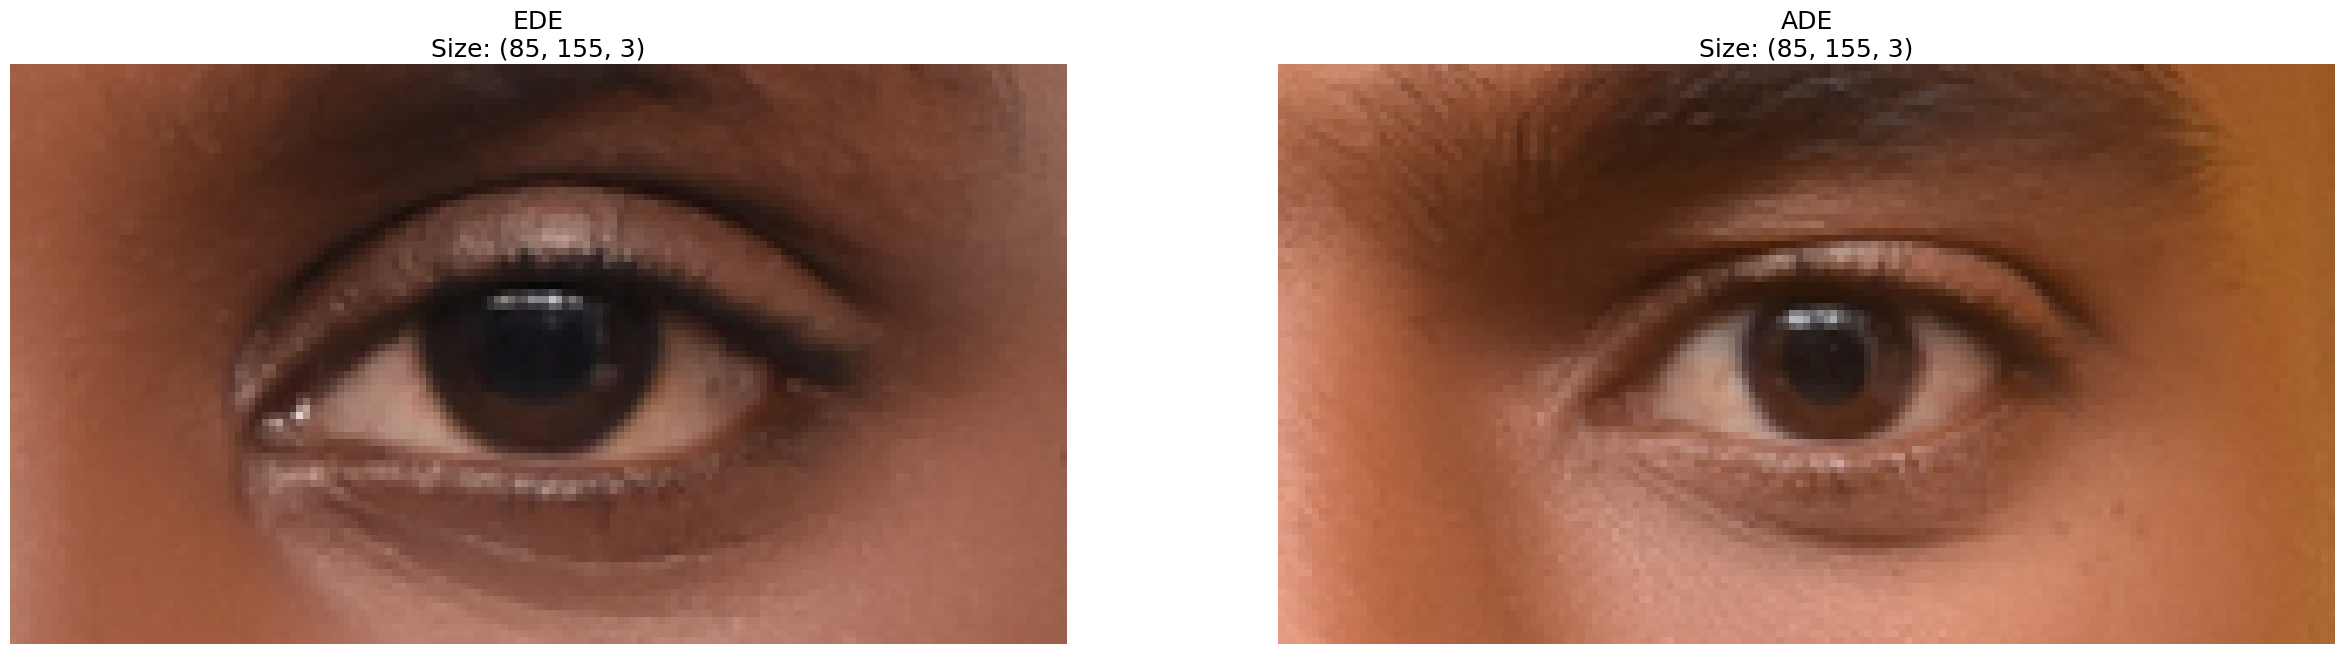

In [ ]:
random_img_plot(train_dir, num_images=2)

In [ ]:
# Setting up Device Agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from torchmetrics import Accuracy

def accuracy_fn(y_pred, y):
  """
  Calculates the accuracy score for the given actual and predicted values
  """
  acc_fn = Accuracy(task="multiclass", num_classes=len(class_names), top_k=1).to(device)
  return acc_fn(y_pred.argmax(dim=1), y)

In [ ]:
def train_step(model: torch.nn.Linear,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.ModuleList,
               optimizer: torch.optim.Optimizer,
               acc_fn = accuracy_fn,
               device=device):
    """
    Trains the model with given Dataloader
    """
    # setting up total train loss and accuracy
    train_loss = 0
    train_acc = 0

    # putting the model to train mode
    model.train()

    # training the model
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # forward pass
        pred_logits = model(X)

        # calculate loss
        loss = loss_fn(pred_logits, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        acc = acc_fn(pred_logits, y)
        train_acc += acc.item()

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

#Trains the model with given Dataloader

In [ ]:
def test_step(model: torch.nn.Linear,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.ModuleList,
               acc_fn = accuracy_fn,
               device=device):
    """
    Evaluates the model on the given dataloader
    """

    valid_loss, valid_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            pred_logits = model(X)

            loss = loss_fn(pred_logits, y)
            valid_loss += loss.item()

            acc = acc_fn(pred_logits, y)
            valid_acc += acc.item()
    valid_loss = valid_loss / len(dataloader)
    valid_acc = valid_acc / len(dataloader)

    return valid_loss, valid_acc

#Training Loop for training and evaluating a model

In [ ]:
from tqdm.notebook import tqdm

def train(model: torch.nn.Linear,
               train_dataloader: torch.utils.data.DataLoader,
               valid_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.ModuleList,
               optimizer: torch.optim.Optimizer,
               epochs: int = 5,
               device=device):
    """
    Training Loop for training and evaluating a model
    """

    # create a results dictionary
    results = {
        "train_loss": [],
        "train_acc": [],
        "valid_loss": [],
        "valid_acc": []
    }

    for epoch in tqdm(range(epochs)):

        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        valid_loss, valid_acc = test_step(model=model,
                                        dataloader=valid_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"Epoch: {epoch+1} | Train Loss: {train_loss} | Train Accuracy: {train_acc} | Validation Loss: {valid_loss} | Validation Accuracy: {valid_acc}")

        # updating results
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["valid_loss"].append(valid_loss)
        results["valid_acc"].append(valid_acc)

    return results

#plot_loss_curves

In [ ]:
def plot_loss_curves(model_results):
  """
  Plots the model's loss and accuracy curves
  """
  train_loss = model_results["train_loss"]
  train_acc = model_results["train_acc"]

  valid_loss = model_results["valid_loss"]
  valid_acc = model_results["valid_acc"]

  epochs = range(len(train_loss))

  plt.figure(figsize=(15, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_loss, label="Train Loss")
  plt.plot(epochs, valid_loss, label="Validation Loss")
  plt.title("Loss")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_acc, label="Train Accuracy")
  plt.plot(epochs, valid_acc, label="Validation Accuracy")
  plt.title("Accuracy")

  plt.legend()
  plt.suptitle("Loss and Accuracy Curves", fontsize=26);

#make_predictions_on_test_data

In [ ]:
def make_predictions_on_test_data(model: torch.nn.Linear,
                                  test_dataloader: torch.utils.data.DataLoader):
  """
  Makes prediction on test dataset
  """
  test_score = 0

  model.eval()
  with torch.inference_mode():
    test_acc = 0
    for batch, (X, y) in enumerate(test_dataloader):
      X, y = X.to(device), y.to(device)

      pred_logits = model(X)
      preds = torch.softmax(pred_logits, dim=1)
      acc = accuracy_fn(y_pred=preds, y=y)
      test_acc += acc

    test_acc = test_acc / len(test_dataloader)
    return test_acc.item()

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets
vit_weights = torchvision.models.ViT_B_32_Weights.DEFAULT

vit_b32_model = torchvision.models.vit_b_32(weights=vit_weights)
vit_b32_model

Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /root/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth
100%|██████████| 337M/337M [00:05<00:00, 67.6MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
vit_weights.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
vit_transforms_with_data_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    vit_weights.transforms()
])

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets

def create_dataloader(path: str,
                      split=False,
                      split_size: int = 0.1,
                      transform: torchvision.transforms = None,
                      batch_size: int = 1,
                      shuffle: bool = False,
                      num_workers = 1,
                      return_classes: bool = False):
    """
    Creates a dataset and convert it into a DataLoader
    """

    if transform is None:
        transform = transforms.Compose([
            transforms.Resize(size=(224, 224)),
            transforms.ToTensor()
        ])

    dataset = datasets.ImageFolder(path,
                                   transform=transform,
                                   target_transform=None,
                                   )

    classes = dataset.classes

    # Making a split
    if split:
      length = int(len(dataset)*split_size)
      rem_length = len(dataset) - length
      dataset, _ = torch.utils.data.random_split(dataset=dataset,
                                                 lengths=[length, rem_length],
                                                 generator=torch.manual_seed(42))

    dataloader = DataLoader(dataset=dataset,
                            batch_size=batch_size,
                            shuffle=shuffle,
                            num_workers=num_workers,
                            pin_memory=True
                            )

    if return_classes:
        return dataloader, classes
    return dataloader

# creating train and test dataloaders with vit transforms

In [ ]:
# creating train and test dataloaders with vit transforms
vit_b32_train_dataloader, class_names = create_dataloader(
    path=train_dir,
    split=True,
    transform=vit_transforms_with_data_augmentation,
    shuffle=True,
    return_classes=True
)

vit_b32_valid_dataloader = create_dataloader(
    path=valid_dir,
    split=True,
    transform=vit_weights.transforms(),
    shuffle=False
)

vit_b32_test_dataloader = create_dataloader(
    path=test_dir,
    transform=vit_weights.transforms(),
    shuffle=False
)

vit_b32_train_dataloader, vit_b32_valid_dataloader, vit_b32_test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79f3746ca500>,
 <torch.utils.data.dataloader.DataLoader at 0x79f4493c83a0>)

In [ ]:
len(vit_b32_train_dataloader), len(vit_b32_valid_dataloader), len(vit_b32_test_dataloader)

(74, 8, 128)

In [ ]:

from torch import nn

# freezing the layers

In [ ]:
# freezing the layers
for i, param in enumerate(vit_b32_model.parameters()):
  param.requires_grad = False
  print(f"Layer: {i} -> Trainable: {param.requires_grad}")

Layer: 0 -> Trainable: False
Layer: 1 -> Trainable: False
Layer: 2 -> Trainable: False
Layer: 3 -> Trainable: False
Layer: 4 -> Trainable: False
Layer: 5 -> Trainable: False
Layer: 6 -> Trainable: False
Layer: 7 -> Trainable: False
Layer: 8 -> Trainable: False
Layer: 9 -> Trainable: False
Layer: 10 -> Trainable: False
Layer: 11 -> Trainable: False
Layer: 12 -> Trainable: False
Layer: 13 -> Trainable: False
Layer: 14 -> Trainable: False
Layer: 15 -> Trainable: False
Layer: 16 -> Trainable: False
Layer: 17 -> Trainable: False
Layer: 18 -> Trainable: False
Layer: 19 -> Trainable: False
Layer: 20 -> Trainable: False
Layer: 21 -> Trainable: False
Layer: 22 -> Trainable: False
Layer: 23 -> Trainable: False
Layer: 24 -> Trainable: False
Layer: 25 -> Trainable: False
Layer: 26 -> Trainable: False
Layer: 27 -> Trainable: False
Layer: 28 -> Trainable: False
Layer: 29 -> Trainable: False
Layer: 30 -> Trainable: False
Layer: 31 -> Trainable: False
Layer: 32 -> Trainable: False
Layer: 33 -> Trainab

In [ ]:
vit_b32_model.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [ ]:
vit_b32_model.heads = nn.Sequential(
    nn.Linear(in_features=768, out_features=len(class_names))
)
vit_b32_model.heads

Sequential(
  (0): Linear(in_features=768, out_features=2, bias=True)
)

In [ ]:
next(iter(vit_b32_train_dataloader))[0].shape

torch.Size([1, 3, 224, 224])

In [ ]:
torch.Size([1, 3, 224, 224])

torch.Size([1, 3, 224, 224])

In [ ]:
summary(model=vit_b32_model,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 2]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 7, 7]       (2,360,064)          False
├─Encoder (encoder)                                          [1, 50, 768]         [1, 50, 768]         38,400               False
│    └─Dropout (dropout)                                     [1, 50, 768]         [1, 50, 768]         --                   --
│    └─Sequential (layers)                                   [1, 50, 768]         [1, 50, 768]         --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 50, 768]         [1, 50, 768]         (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 50, 768]         [1, 5

# creating loss function and optimizer for ViT model

In [ ]:
# creating loss function and optimizer for ViT model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=vit_b32_model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

vit_b32_results = train(
    model=vit_b32_model,
    train_dataloader=vit_b32_train_dataloader,
    valid_dataloader=vit_b32_valid_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=25,
    device=device
)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 0.7908219876321586 | Train Accuracy: 0.4594594594594595 | Validation Loss: 0.9597850907593966 | Validation Accuracy: 0.375
Epoch: 2 | Train Loss: 0.8405528195403718 | Train Accuracy: 0.4594594594594595 | Validation Loss: 0.6462018638849258 | Validation Accuracy: 0.625
Epoch: 3 | Train Loss: 0.787577146211186 | Train Accuracy: 0.47297297297297297 | Validation Loss: 0.7988099753856659 | Validation Accuracy: 0.5
Epoch: 4 | Train Loss: 0.7125084831102474 | Train Accuracy: 0.581081081081081 | Validation Loss: 0.6758481897413731 | Validation Accuracy: 0.5
Epoch: 5 | Train Loss: 0.63434551907955 | Train Accuracy: 0.6891891891891891 | Validation Loss: 0.6466394327580929 | Validation Accuracy: 0.625
Epoch: 6 | Train Loss: 0.7269921234582324 | Train Accuracy: 0.581081081081081 | Validation Loss: 0.6051529077813029 | Validation Accuracy: 0.625
Epoch: 7 | Train Loss: 0.7338100593235042 | Train Accuracy: 0.5405405405405406 | Validation Loss: 0.633234204724431 | Validation Acc

In [ ]:
vit_b32_results

{'train_loss': [0.7908219876321586,
  0.8405528195403718,
  0.787577146211186,
  0.7125084831102474,
  0.63434551907955,
  0.7269921234582324,
  0.7338100593235042,
  0.569702143604691,
  0.5977471563713374,
  0.6124313914695302,
  0.5658002897492937,
  0.5579386777684998,
  0.5573505947013965,
  0.5649992854309243,
  0.5132406003571846,
  0.6688819781851929,
  0.5833661806694156,
  0.5921614963586468,
  0.42318320405241605,
  0.4240228362582825,
  0.5765161805886876,
  0.4268323425832834,
  0.407633962512419,
  0.5436998262145633,
  0.3988606797380222],
 'train_acc': [0.4594594594594595,
  0.4594594594594595,
  0.47297297297297297,
  0.581081081081081,
  0.6891891891891891,
  0.581081081081081,
  0.5405405405405406,
  0.6621621621621622,
  0.6756756756756757,
  0.6621621621621622,
  0.7297297297297297,
  0.7297297297297297,
  0.6891891891891891,
  0.6891891891891891,
  0.7837837837837838,
  0.6756756756756757,
  0.7027027027027027,
  0.7297297297297297,
  0.8648648648648649,
  0.82432

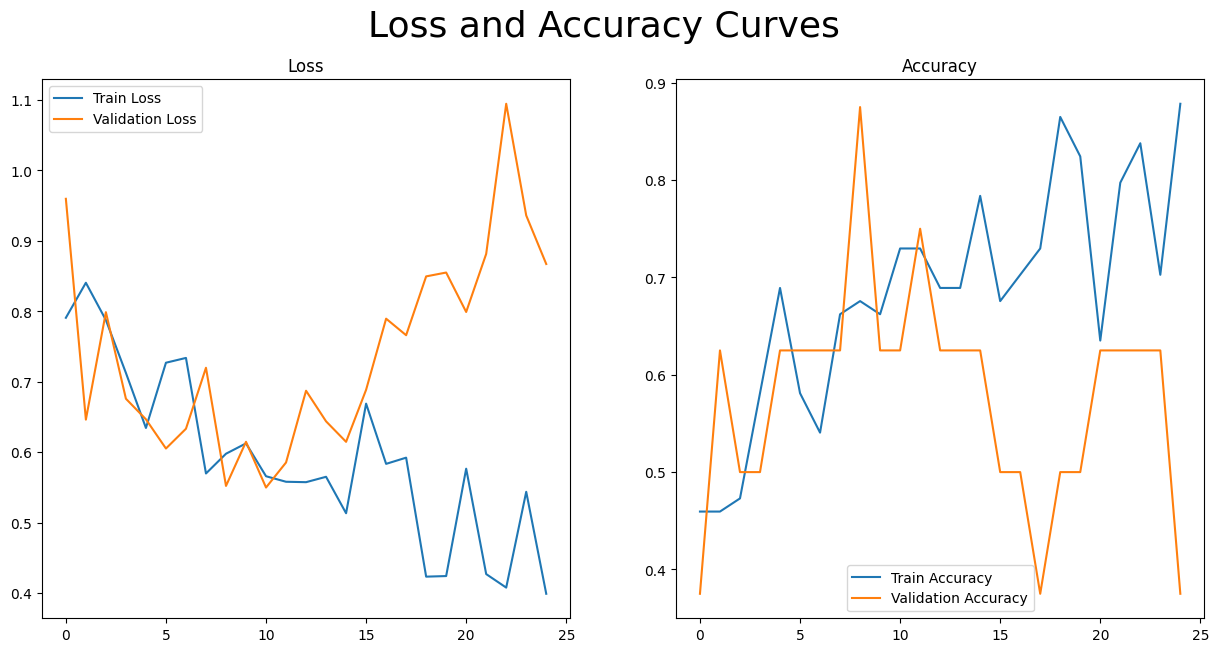

In [ ]:
plot_loss_curves(vit_b32_results)

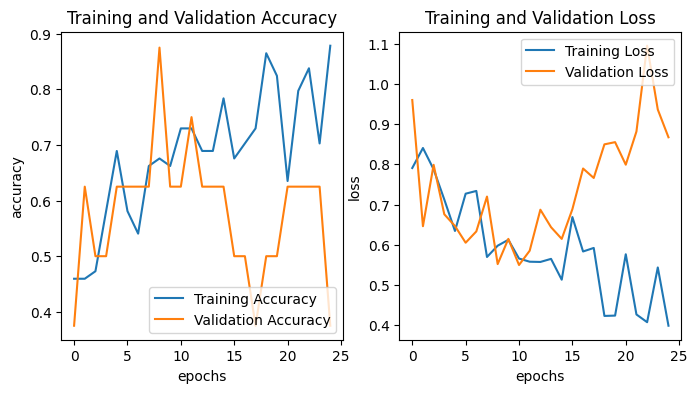

In [ ]:
# Learning curves, Here we can visualize The outcome graphically for the BERT_model.
from matplotlib import pyplot as plt
train_acc = vit_b32_results["train_acc"]
train_loss = vit_b32_results["train_loss"]
valid_acc=vit_b32_results["valid_acc"]
valid_loss=vit_b32_results["valid_loss"]

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(valid_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# making prediction on test data
vit_b32_test_results = make_predictions_on_test_data(model=vit_b32_model,
                                                            test_dataloader=vit_b32_test_dataloader)
vit_b32_test_results
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7235294117647059


In [ ]:
# Overall vit_b32_results
vit_b32_scores = {
    "train_loss": vit_b32_results["train_loss"][-1],
    "train_acc": vit_b32_results["train_acc"][-1],

    "valid_loss": vit_b32_results["valid_loss"][-7],
    "valid_acc": vit_b32_results["valid_acc"][-1],

    "test_acc": accuracy
}
vit_b32_scores# creating a dataframe to store the overall results
results_df = pd.DataFrame(data=[vit_b32_scores], index=["ViT_B32"])
results_df

,train_loss,train_acc,valid_loss,valid_acc,test_acc
ViT_B32,0.398861,0.878378,0.849602,0.375,0.723529


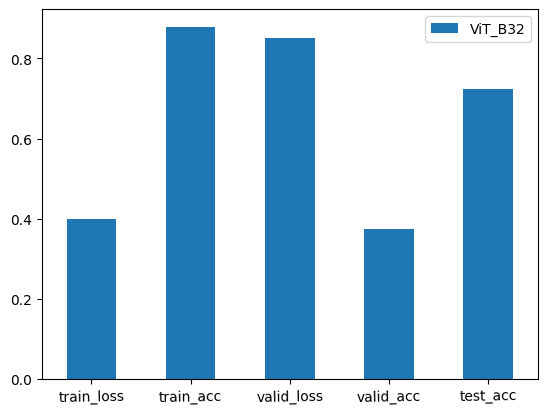

In [ ]:
# plotting the results
results_df.T.plot.bar()
plt.xticks(rotation=1)
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Predict on test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7235294117647059


In [ ]:
from sklearn.metrics import classification_report

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.51      0.58        65
           1       0.74      0.86      0.79       105

    accuracy                           0.72       170
   macro avg       0.71      0.68      0.69       170
weighted avg       0.72      0.72      0.71       170



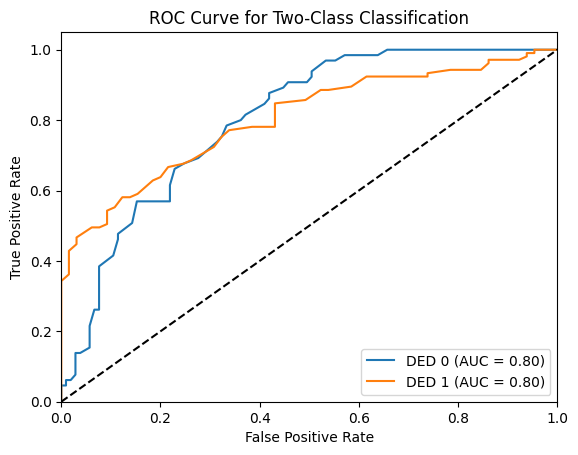

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for each class
y_pred_proba = rf_classifier.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'DED {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Two-Class Classification')
plt.legend(loc='lower right')
plt.show()